# Cell Mask Information

Gives an overview on how to access cell mask information from the vr2p ExperimentData object.
Can be useful for tracking registration accuracy, seeing cell locations etc.

## Accessing the data.

### Select vr2p file
Select the vr2p zarr file for the animal you want to look at

In [ ]:
%load_ext autoreload
%autoreload 2
from ipyfilechooser import FileChooser
import matplotlib.pyplot as plt
import vr2p
# Create and display a FileChooser widget
fc = FileChooser()
display(fc)

### Create the ExperimentData Object
All the experimental data from an animal can be accessed using the ExperimentData object

In [2]:
data = vr2p.ExperimentData(fc.selected) # You can normally just put the file path here as a text string.

## Cell Mask Information

Cell mask information is stored under data.cells

Two different sets of cells masks are stored for each session:

* **data.cells.single_session:** Cell masks found by suite2p within that recording (before registration). Size is number of sessions.
* **data.images.multi_session:** Cell masks that are the result of the registration and clustering process. Size is number of cells masks.

The multi_session cell masks are stored in 2 spatial coordiantes variaties.

* **data.cells.multi_session.original:** Original, session specific (before registration) coordinates 
* **data.images.multi_session.registered:** Registered, common (after registration) coordinates

Each cell mask data set is an array of dictionaries with each entry being one cell mask.
Here is a list of the most important keys:

* **ypix:** y dimension pixels that make up the mask
* **xpix:** x dimension pixels that make up the mask
* **lam:** lambda, or weights, of the mask (corredsponding to previous x/y pixels)
* **med:** median coordinates of the mask
* **overlap:** pixels that overlay with other masks (corredsponding to previous x/y pixels)
* **npix:** number of pixels in the mask
* **neuropil_mask:** single integer index of neuropil masks used for subtracting neuropil




### Accessing single cell mask

Cell mask information is stored as array of dictionaries.

In [22]:
# Get number of found cells in original recording
print(f"Suite2p found {data.cells.single_session[0].size} in the first recording.")
# Get number of cells after regstration.
print(f"After the registration process there were a total of {len(data.cells.multi_session.registered)} cells")

Suite2p found 7309 in the first recording.
After the registration process there were a total of 5480 cells


### Plot single cell mask image.

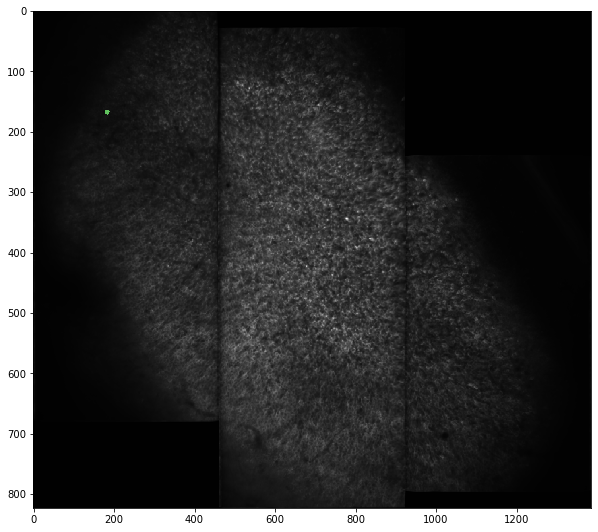

In [46]:
import numpy as np
%matplotlib inline
fig, ax = plt.subplots(1,1,figsize=(10,10))

# get FOV image.
fov_img = data.images.registered[0]['mean_img']
ax.imshow(fov_img,interpolation='none',cmap='gray',aspect=1.5) # correct non uniform aspect ratio.

# create masks overlay image.
cell_mask = data.cells.multi_session.registered[0]
mask_img = np.zeros(fov_img.shape)
mask_img = np.ma.masked_where(mask_img ==0 , mask_img) # mask zero values.
mask_img[cell_mask['ypix'],cell_mask['xpix']]=1
ax.imshow(mask_img,interpolation='none',cmap='jet',aspect=1.5,vmin=0,vmax=2,alpha=0.75)

## Convenience function: plot all cell masks
Requires the create_mask_img function from the multiday_suite2p repo

From documentation:
```python
    """Function for creating (label) images from cells masks info.

    Args:
        masks (list of dicitonaries): Dictionaries must contain 'xpix' 'ypix'
        im_size (list): size of image to create.
        field ([string], optional): Instead of mask id use this field. Defaults to None.
        mark_overlap (bool, optional): show overlaping regions as fixed value (100). Defaults to False. Ignored if contours is True.
        contours (bool,optional): show contours of masks (disables mark_overlap)
        contour_upsampling (int,optional): upscale contours image by this factor (helpful for generating pretty overlay images)

    Returns:
        [numpy array]: resulting image.
    """
```

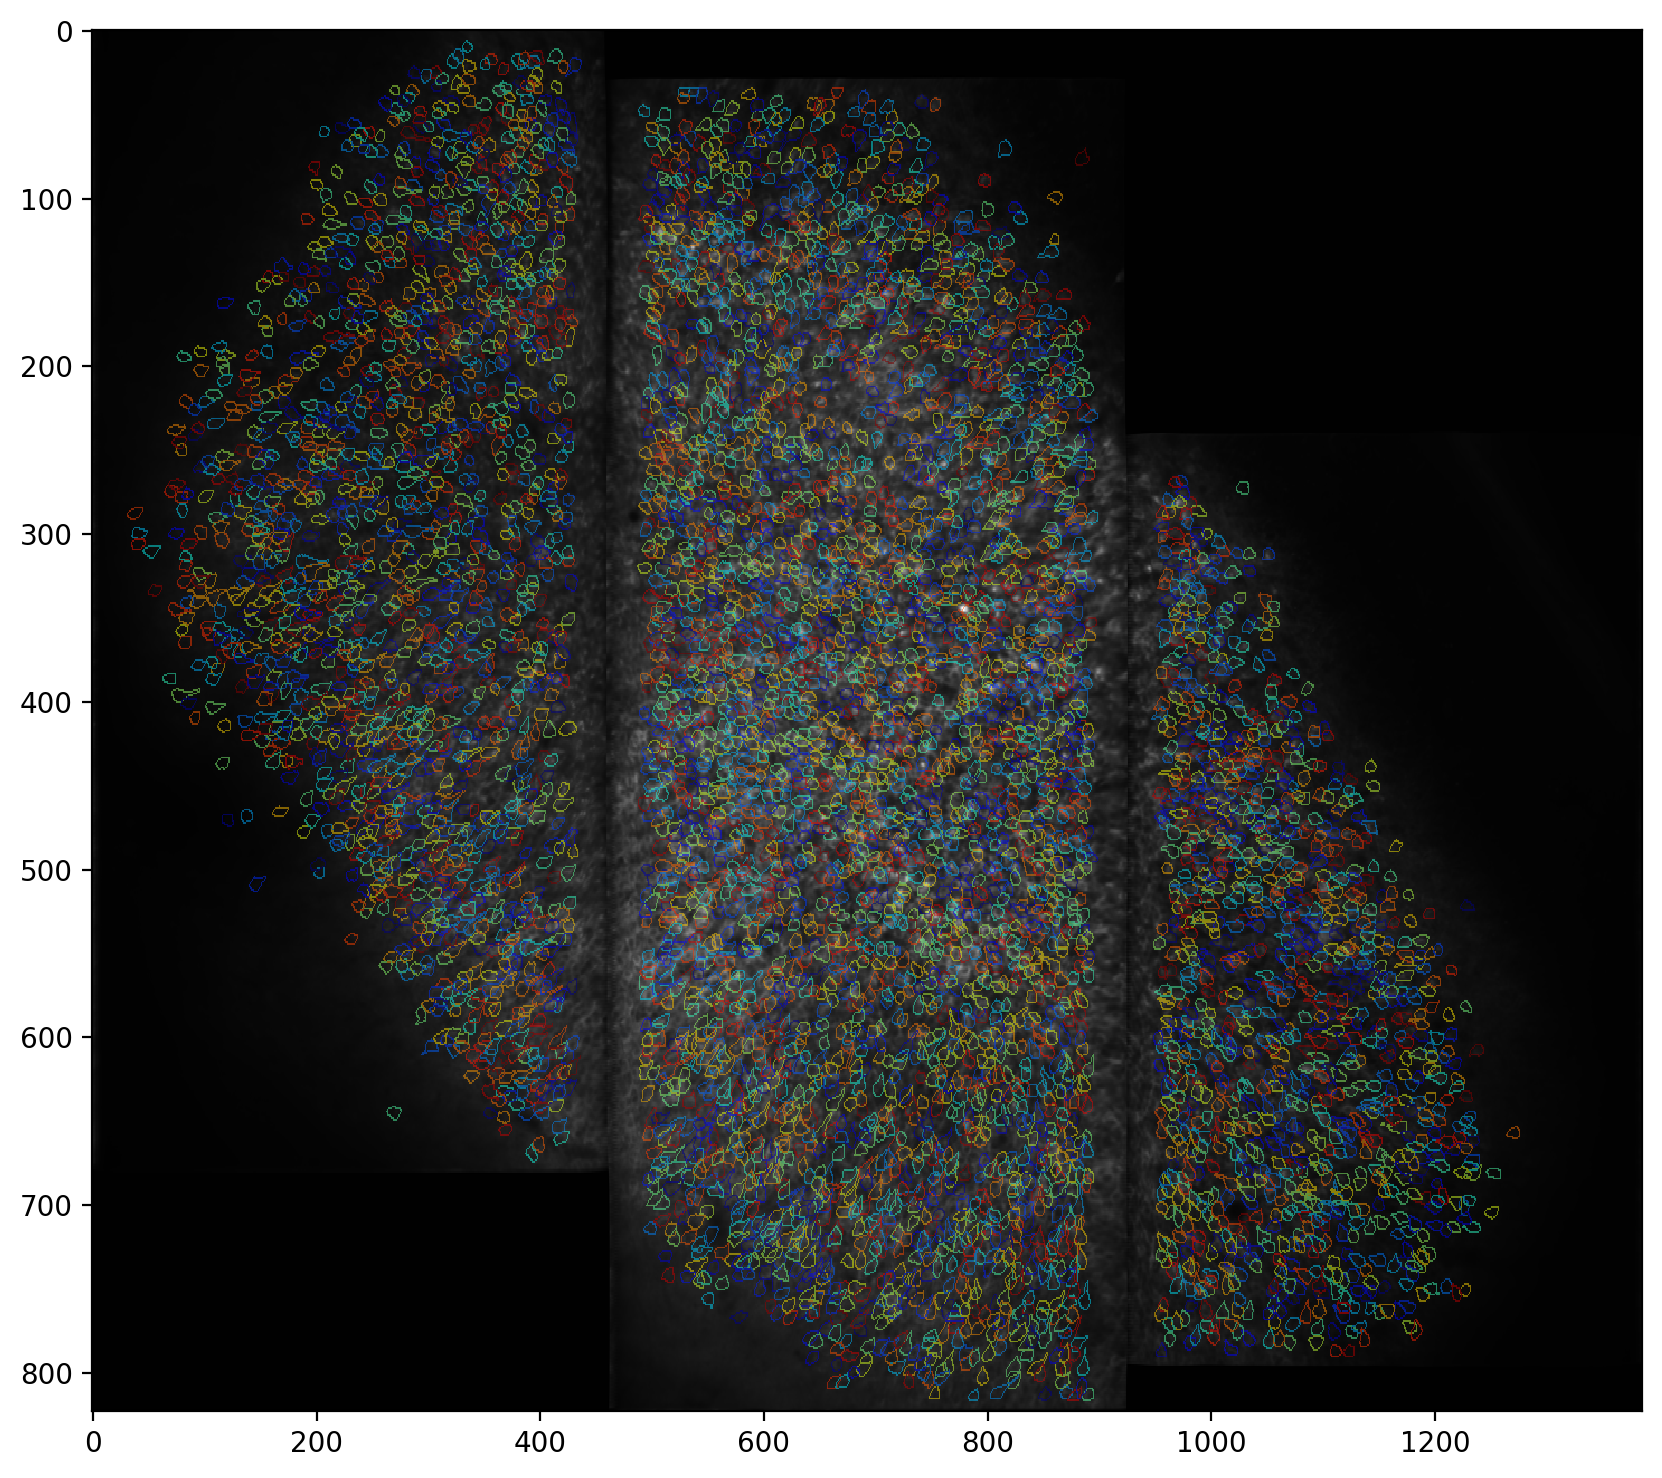

In [56]:
import numpy as np
from multiday_suite2p.utils import create_mask_img
%matplotlib inline
fig, ax = plt.subplots(1,1,figsize=(10,10),dpi=200)

# get FOV image.
fov_img = data.images.registered[0]['mean_img']
ax.imshow(fov_img,interpolation='none',cmap='gray',aspect=1.5) # correct non uniform aspect ratio.

# get image of cell masks.
cells_img = create_mask_img(data.cells.multi_session.registered, fov_img.shape,contours=True)
# create random colormap.
vals = np.linspace(0,1,np.max(cells_img))
np.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.jet(vals))
masked = np.ma.masked_where(cells_img == 0, cells_img)
ax.imshow(masked, cmap=cmap, interpolation='none', alpha=0.5,aspect=1.5)